In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ecommerce = pd.read_csv('ecommerce_dataset_us.csv', sep = '\t') 
ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


In [3]:
ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


In [4]:
#describing numeric columns
ecommerce.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
#convert InvoiceDate to datetime datatype
ecommerce['InvoiceDate'] = pd.to_datetime(ecommerce['InvoiceDate'], format = '%m/%d/%Y %H:%M')

In [6]:
#covert Description string to readable format

ecommerce['Description'] = ecommerce['Description'].str.lower()
ecommerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17850.0
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17850.0
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17850.0
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29 08:26:00,3.39,17850.0
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29 08:26:00,3.39,17850.0


In [7]:
#convert CustomerID float to int
ecommerce['CustomerID'] = ecommerce['CustomerID'].astype('Int64')

#### Check for  Missing values , duplicates and outliers

In [8]:
#Check for missing values
ecommerce.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

There are 1454 and 135080 missing values in column Description and CustomerID.

In [9]:
#check for duplicates
ecommerce.duplicated().sum()

5268

In [10]:
ecommerce.describe(include = 'object')

,InvoiceNo,StockCode,Description
count,541909,541909,540455
unique,25900,4070,4206
top,573585,85123A,white hanging heart t-light holder
freq,1114,2313,2369


In [11]:
#fill customer ID's with  NaN values
ecommerce['CustomerID'].fillna(value=np.nan, inplace=True)
ecommerce.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
379815,569702,84879,assorted colour bird ornament,8,2019-10-03 16:09:00,1.69,14396
106703,545339,22723,set of 6 herb tins sketchbook,4,2019-02-28 08:26:00,3.95,14292
414451,572459,22138,baking set 9 piece retrospot,3,2019-10-22 12:53:00,4.95,14911
263936,560047,21719,lovely bonbon sticker sheet,1,2019-07-12 15:01:00,0.85,17259
340474,566647,21498,red retrospot wrap,50,2019-09-12 11:21:00,0.42,18001


In [12]:
#make a copy of original df 
df=ecommerce.copy()

In [13]:
#check Description with Null values
df[df['Description'].isnull() == True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.0,<NA>
1970,536545,21134,NaN,1,2018-11-29 14:32:00,0.0,<NA>
1971,536546,22145,NaN,1,2018-11-29 14:33:00,0.0,<NA>
1972,536547,37509,NaN,1,2018-11-29 14:33:00,0.0,<NA>
1987,536549,85226A,NaN,1,2018-11-29 14:34:00,0.0,<NA>
...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2019-12-05 18:26:00,0.0,<NA>
535326,581203,23406,NaN,15,2019-12-05 18:31:00,0.0,<NA>
535332,581209,21620,NaN,6,2019-12-05 18:35:00,0.0,<NA>
536981,581234,72817,NaN,27,2019-12-06 10:33:00,0.0,<NA>


* A sample of records where Description is null shows that some values in StockCode are not the 5-digit numbering convention, this could indicate a data quality issue. 
* Negative quantities and a UnitPrice of 0 suggest that there may be some errors in the data.
* CustomerID is null for these records, this could indicate that these transactions were made by non-registered users, or that there was an error in recording the customer information.
* It is important to investigate these issues further to determine the root cause and take appropriate actions to ensure the data quality and accuracy.

In [14]:
#check CustomerID with null values
df[df['CustomerID'].isnull() == True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
622,536414,22139,NaN,56,2018-11-29 11:52:00,0.00,<NA>
1443,536544,21773,decorative rose bathroom bottle,1,2018-11-29 14:32:00,2.51,<NA>
1444,536544,21774,decorative cats bathroom bottle,2,2018-11-29 14:32:00,2.51,<NA>
1445,536544,21786,polkadot rain hat,4,2018-11-29 14:32:00,0.85,<NA>
1446,536544,21787,rain poncho retrospot,2,2018-11-29 14:32:00,1.66,<NA>
...,...,...,...,...,...,...,...
541536,581498,85099B,jumbo bag red retrospot,5,2019-12-07 10:26:00,4.13,<NA>
541537,581498,85099C,jumbo bag baroque black white,4,2019-12-07 10:26:00,4.13,<NA>
541538,581498,85150,ladies & gentlemen metal sign,1,2019-12-07 10:26:00,4.96,<NA>
541539,581498,85174,s/4 cacti candles,1,2019-12-07 10:26:00,10.79,<NA>


- A sample of records where CustomerID is null shows mostly valid sales transactions, it is possible that these transactions were made by customers who are not registered or did not provide their information at the time of purchase.

In [15]:
#check for data with Quantity is 0 or negative.
df[df['Quantity'] <= 0].sample(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
287600,C562111,23240,set of 4 knick knack tins doiley,-1,2019-07-31 15:48:00,3.75,15125
519818,C580168,22321,bird decoration red retrospot,-1,2019-11-30 11:34:00,0.85,12465
88207,C543787,85178,victorian sewing kit,-48,2019-02-09 17:05:00,0.85,15061
501809,C578832,84987,set of 36 teatime paper doilies,-2,2019-11-23 15:18:00,1.45,13069
361947,C568395,22306,silver mug bone china tree of life,-1,2019-09-25 10:21:00,1.06,17480
516553,C579929,22307,gold mug bone china tree of life,-1,2019-11-29 09:34:00,1.06,17828
69140,C541961,22767,triple photo frame cornice,-2,2019-01-22 12:58:00,9.95,17799
170484,551302,48189,damaged,-18,2019-04-25 14:55:00,0.00,<NA>
337779,C566468,22423,regency cakestand 3 tier,-1,2019-09-10 18:14:00,10.95,13319
397668,C571196,22809,set of 6 t-lights santa,-6,2019-10-12 12:02:00,2.95,<NA>


* Transactions with negative quantities are associated with Invoice numbers that begin with the letter "C," which indicates that these are cancellations of orders.
* A subset of entries in the dataset have a UnitPrice value of 0 and a missing CustomerID, which suggests potential errors in recording customer information or the occurrence of adjustments, returns or damages.

In [16]:
#details of InvoiceNo
df['InvoiceNo'].str[0].value_counts()

5    532618
C      9288
A         3
Name: InvoiceNo, dtype: int64

In [17]:
#check for InvoiceNo start with A
df[df['InvoiceNo'].str[0] == 'A']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
299982,A563185,B,adjust bad debt,1,2019-08-10 14:50:00,11062.06,<NA>
299983,A563186,B,adjust bad debt,1,2019-08-10 14:51:00,-11062.06,<NA>
299984,A563187,B,adjust bad debt,1,2019-08-10 14:52:00,-11062.06,<NA>


- We see that the data pretainign to bad debt adjustment appear to be unrelated to products or sales. Therefore, based on the analysis it has been removed from the dataset.

In [18]:
#delete data related to bad debt adjustments
df=df[df['InvoiceNo'].str[0] != 'A']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541906 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541906 non-null  object        
 1   StockCode    541906 non-null  object        
 2   Description  540452 non-null  object        
 3   Quantity     541906 non-null  int64         
 4   InvoiceDate  541906 non-null  datetime64[ns]
 5   UnitPrice    541906 non-null  float64       
 6   CustomerID   406829 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 33.6+ MB


In [19]:
#Check for details in StockCode with non-numeric or alpha
S_codes = df['StockCode'].astype('str').unique().tolist()
print(sorted(S_codes)[-35:])

['90214W', '90214Y', '90214Z', 'AMAZONFEE', 'BANK CHARGES', 'C2', 'CRUK', 'D', 'DCGS0003', 'DCGS0004', 'DCGS0055', 'DCGS0057', 'DCGS0066P', 'DCGS0067', 'DCGS0068', 'DCGS0069', 'DCGS0070', 'DCGS0071', 'DCGS0072', 'DCGS0073', 'DCGS0074', 'DCGS0076', 'DCGSSBOY', 'DCGSSGIRL', 'DOT', 'M', 'PADS', 'POST', 'S', 'gift_0001_10', 'gift_0001_20', 'gift_0001_30', 'gift_0001_40', 'gift_0001_50', 'm']


There are values in StockCode that are alpha or non-numeric, it need further investigation.

In [20]:
alpha_num = ['AMAZONFEE', 'BANK CHARGES', 'C2', 'CRUK', 'D', 'DCGS0003', 'DCGS0004', 'DCGS0055', 'DCGS0057', 
         'DCGS0066P', 'DCGS0067', 'DCGS0068', 'DCGS0069', 'DCGS0070', 'DCGS0071', 'DCGS0072', 'DCGS0073', 
         'DCGS0074', 'DCGS0076', 'DCGSSBOY', 'DCGSSGIRL', 'DOT', 'M', 'PADS', 'POST', 'S', 'gift_0001_10', 
         'gift_0001_20', 'gift_0001_30', 'gift_0001_40', 'gift_0001_50', 'm']
alpha_num = df[df['StockCode'].isin(alpha_num)]
alpha_num.shape

(2992, 7)

There are 2992 records in StockCode is non_numeric. 

In [21]:
alpha_num1 = ['AMAZONFEE', 'BANK CHARGES', 'C2', 'CRUK', 'D']
alpha_num1_df = df.loc[df['StockCode'].isin(alpha_num1)]
alpha_num1_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
141,C536379,D,discount,-1,2018-11-29 09:41:00,27.50,14527
1423,536540,C2,carriage,1,2018-11-29 14:05:00,50.00,14911
4406,536779,BANK CHARGES,bank charges,1,2018-11-30 15:08:00,15.00,15823
9038,C537164,D,discount,-1,2018-12-03 13:21:00,29.29,14527
12119,537368,C2,carriage,1,2018-12-04 12:40:00,50.00,14911
...,...,...,...,...,...,...,...
524450,580555,C2,carriage,1,2019-12-03 10:18:00,50.00,14911
524601,C580604,AMAZONFEE,amazon fee,-1,2019-12-03 11:35:00,11586.50,<NA>
524602,C580605,AMAZONFEE,amazon fee,-1,2019-12-03 11:36:00,17836.46,<NA>
528087,C580726,CRUK,cruk commission,-1,2019-12-03 17:17:00,1100.44,14096


There are a total of 308 records in the dataset where the values of StockCode correspond to the items AMAZONFEE, BANK CHARGES, C2, CRUK, and D. As these are not indicative of the sale of a product, it is recommended that these records be removed from the dataset for accurate analysis.

In [22]:
#drop data of StockCode in alpha_nnum1
df = df[~df['StockCode'].isin(alpha_num1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541598 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541598 non-null  object        
 1   StockCode    541598 non-null  object        
 2   Description  540145 non-null  object        
 3   Quantity     541598 non-null  int64         
 4   InvoiceDate  541598 non-null  datetime64[ns]
 5   UnitPrice    541598 non-null  float64       
 6   CustomerID   406590 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 33.6+ MB


In [23]:
#count the number of StockCode with DCG
df[df['StockCode'].str.startswith('DCGS')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
21326,538071,DCGS0076,sunjar led night night light,1,2018-12-07 14:09:00,16.13,<NA>
24906,538349,DCGS0003,boxed glass ashtray,1,2018-12-08 14:59:00,2.51,<NA>
36460,539451,DCGS0003,boxed glass ashtray,1,2018-12-15 16:59:00,2.51,<NA>
39313,539631,DCGS0076,sunjar led night night light,2,2018-12-18 15:03:00,16.13,<NA>
40052,539718,DCGS0070,camouflage dog collar,1,2018-12-19 13:06:00,12.72,<NA>
74825,542529,DCGS0055,NaN,-1,2019-01-26 13:08:00,0.00,<NA>
74838,542531,DCGS0072,NaN,-1,2019-01-26 13:08:00,0.00,<NA>
74839,542532,DCGS0074,NaN,-1,2019-01-26 13:09:00,0.00,<NA>
75053,542541,DCGS0069,ooh la la dogs collar,1,2019-01-26 14:25:00,15.79,<NA>
75295,542582,DCGS0057,NaN,-6,2019-01-26 15:01:00,0.00,<NA>


In [24]:
#Counts the number of records with StockCode starting with DCGS
count_dcgs = len(df[df['StockCode'].str.startswith('DCGS')])
print('There are {} records where StockCode starts with DCGS.'.format(count_dcgs))

#Counts the number of records with StockCode starting with DCGS and UnitPrice equal to 0
count_dcgs_unitprice_0 = len(df[(df['StockCode'].str.startswith('DCGS')) & (df['UnitPrice'] == 0)])
print('There are {} records where StockCode starts with DCGS and UnitPrice is 0.'.format(count_dcgs_unitprice_0))

There are 45 records where StockCode starts with DCGS.
There are 12 records where StockCode starts with DCGS and UnitPrice is 0.


- There are 45 records where StockCode starts with DCGS.
- There are 12 records in the dataset that have a Unitprice of 0 and belong to the group of StockCodes starting with 'DCGS' and have a description that is either 'Ebay' or missing values (NaN).
- It could indicate that these records are related to non-sale transactions or gifts, these will be removed.

In [25]:
df = df.loc[~((df['StockCode'].str.startswith('DCGS')) & (df['UnitPrice'] == 0))]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541586 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541586 non-null  object        
 1   StockCode    541586 non-null  object        
 2   Description  540140 non-null  object        
 3   Quantity     541586 non-null  int64         
 4   InvoiceDate  541586 non-null  datetime64[ns]
 5   UnitPrice    541586 non-null  float64       
 6   CustomerID   406590 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 33.6+ MB


In [27]:
#Display data with StockCode 'DOT', 'M', 'PADS', 'POST', 'S', 'm'
a2 = ['DOT', 'M', 'PADS', 'POST', 'S', 'm']
temp = df[df['StockCode'].isin(a2)]
print(temp['StockCode'].value_counts())
print('Total:', len(temp))

POST    1256
DOT      710
M        571
S         63
PADS       4
m          1
Name: StockCode, dtype: int64
Total: 2605


In [28]:
df[df['StockCode'].isin(['M', 'DOT'])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
1814,536544,DOT,dotcom postage,1,2018-11-29 14:32:00,569.77,<NA>
2239,536569,M,manual,1,2018-11-29 15:35:00,1.25,16274
2250,536569,M,manual,1,2018-11-29 15:35:00,18.95,16274
3041,536592,DOT,dotcom postage,1,2018-11-29 17:06:00,607.49,<NA>
5450,536862,DOT,dotcom postage,1,2018-12-01 11:13:00,254.43,<NA>
...,...,...,...,...,...,...,...
538321,581405,M,manual,3,2019-12-06 13:50:00,0.42,13521
539368,581439,DOT,dotcom postage,1,2019-12-06 16:30:00,938.59,<NA>
540908,581492,DOT,dotcom postage,1,2019-12-07 10:03:00,933.17,<NA>
541540,581498,DOT,dotcom postage,1,2019-12-07 10:26:00,1714.17,<NA>


In [29]:
df[df['StockCode'].isin(['PADS'])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
157195,550193,PADS,pads to match all cushions,1,2019-04-13 09:27:00,0.001,13952
279045,561226,PADS,pads to match all cushions,1,2019-07-24 10:13:00,0.001,15618
358655,568158,PADS,pads to match all cushions,1,2019-09-23 12:22:00,0.000,16133
359871,568200,PADS,pads to match all cushions,1,2019-09-23 14:58:00,0.001,16198


In [30]:
df[df['StockCode'].isin(['POST'])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
45,536370,POST,postage,3,2018-11-29 08:45:00,18.0,12583
386,536403,POST,postage,1,2018-11-29 11:27:00,15.0,12791
1123,536527,POST,postage,1,2018-11-29 13:04:00,18.0,12662
5073,536840,POST,postage,1,2018-11-30 18:27:00,18.0,12738
5258,536852,POST,postage,1,2018-12-01 09:51:00,18.0,12686
...,...,...,...,...,...,...,...
541198,581493,POST,postage,1,2019-12-07 10:10:00,15.0,12423
541216,581494,POST,postage,2,2019-12-07 10:13:00,18.0,12518
541730,581570,POST,postage,1,2019-12-07 11:59:00,18.0,12662
541767,581574,POST,postage,2,2019-12-07 12:09:00,18.0,12526


In [31]:
df[df['StockCode'].isin(['S'])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
14436,C537581,S,samples,-1,2018-12-05 12:03:00,12.95,<NA>
14437,C537581,S,samples,-1,2018-12-05 12:03:00,52.00,<NA>
96680,C544580,S,samples,-1,2019-02-19 14:25:00,5.74,<NA>
96681,C544580,S,samples,-1,2019-02-19 14:25:00,11.08,<NA>
96682,C544580,S,samples,-1,2019-02-19 14:25:00,5.79,<NA>
...,...,...,...,...,...,...,...
414147,C572347,S,samples,-1,2019-10-22 11:03:00,33.05,<NA>
419666,572849,S,samples,1,2019-10-24 12:20:00,33.05,<NA>
480961,C577330,S,samples,-1,2019-11-16 14:16:00,2.89,<NA>
480962,C577330,S,samples,-1,2019-11-16 14:16:00,75.00,<NA>


In [32]:
df[df['StockCode'].isin(['m'])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
40383,539736,m,manual,1,2018-12-19 15:18:00,2.55,<NA>


In [33]:
df[df['StockCode'].isin(['PADS'])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
157195,550193,PADS,pads to match all cushions,1,2019-04-13 09:27:00,0.001,13952
279045,561226,PADS,pads to match all cushions,1,2019-07-24 10:13:00,0.001,15618
358655,568158,PADS,pads to match all cushions,1,2019-09-23 12:22:00,0.000,16133
359871,568200,PADS,pads to match all cushions,1,2019-09-23 14:58:00,0.001,16198


In [34]:
a2=['DOT', 'M', 'PADS','POST', 'S', 'm']
df=df[~df['StockCode'].isin(a2)]

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538981 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    538981 non-null  object        
 1   StockCode    538981 non-null  object        
 2   Description  537540 non-null  object        
 3   Quantity     538981 non-null  int64         
 4   InvoiceDate  538981 non-null  datetime64[ns]
 5   UnitPrice    538981 non-null  float64       
 6   CustomerID   404909 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 33.4+ MB


In [36]:
#display data where StockCode with 'gift'
df[df['StockCode'].str.contains('gift')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
38248,539492,gift_0001_40,dotcomgiftshop gift voucher £40.00,1,2018-12-18 10:14:00,34.04,<NA>
42057,539958,gift_0001_50,dotcomgiftshop gift voucher £50.00,1,2018-12-21 13:26:00,42.55,<NA>
44725,540238,gift_0001_30,dotcomgiftshop gift voucher £30.00,1,2019-01-03 14:44:00,25.53,<NA>
44794,540238,gift_0001_20,dotcomgiftshop gift voucher £20.00,1,2019-01-03 14:44:00,17.02,<NA>
55589,540995,gift_0001_20,dotcomgiftshop gift voucher £20.00,1,2019-01-11 09:30:00,16.67,<NA>
91278,544089,gift_0001_20,dotcomgiftshop gift voucher £20.00,1,2019-02-13 17:51:00,16.67,<NA>
94054,544323,gift_0001_30,dotcomgiftshop gift voucher £30.00,1,2019-02-15 15:51:00,25.00,<NA>
95034,544434,gift_0001_30,dotcomgiftshop gift voucher £30.00,1,2019-02-16 16:12:00,25.00,<NA>
112442,545895,gift_0001_10,dotcomgiftshop gift voucher £10.00,1,2019-03-05 17:14:00,8.33,<NA>
145463,548893,gift_0001_40,dotcomgiftshop gift voucher £40.00,1,2019-04-02 15:54:00,33.33,<NA>


In [37]:
print(len(df[df['StockCode'].str.contains('gift')]))

34


There are 34 records where StockCode starts with 'gift', which represent gift vouchers. These records will be removed.

In [38]:
#delete data records where stockcode with 'gift'
df=df[~df['StockCode'].str.contains('gift')]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538947 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    538947 non-null  object        
 1   StockCode    538947 non-null  object        
 2   Description  537508 non-null  object        
 3   Quantity     538947 non-null  int64         
 4   InvoiceDate  538947 non-null  datetime64[ns]
 5   UnitPrice    538947 non-null  float64       
 6   CustomerID   404909 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 33.4+ MB


In [40]:
#Data with UnitPrice is 0 
print("Total number of transactions where the unit Price = 0 is",(df['UnitPrice'] == 0).sum())
df[df['UnitPrice'] == 0].sample(20)

Total number of transactions where the unit Price = 0 is 2485


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
242904,558377,37423,NaN,-17,2019-06-26 16:24:00,0.0,<NA>
193208,553521,22520,childs garden trowel blue,1,2019-05-15 14:35:00,0.0,<NA>
281887,561609,47589,NaN,-1,2019-07-26 12:24:00,0.0,<NA>
279511,561327,85213,NaN,36,2019-07-24 13:54:00,0.0,<NA>
42289,539980,35001W,NaN,-36,2018-12-21 14:34:00,0.0,<NA>
7188,536996,22712,NaN,-20,2018-12-01 15:30:00,0.0,<NA>
134134,547827,22444,NaN,82,2019-03-23 15:10:00,0.0,<NA>
73753,542379,35922,NaN,-30,2019-01-25 13:58:00,0.0,<NA>
146985,549036,84993B,NaN,-54,2019-04-03 17:09:00,0.0,<NA>
14358,537534,22472,tv dinner tray dolly girl,1,2018-12-05 11:48:00,0.0,<NA>


In [41]:
a=df[df['UnitPrice'] == 0]
print(a['Description'].value_counts())

check                               162
damaged                              58
?                                    47
damages                              46
found                                34
                                   ... 
traditional wooden skipping rope      1
wet/mouldy                            1
display                               1
party bunting                         1
wrongly coded 23343                   1
Name: Description, Length: 355, dtype: int64


- UnitPrice 0 means no sales transcation or sales revenue was recorded.
- Transactions with a valid product description are assumed to be inventory adjustments or giveaways/freebies, rather than sales transactions.
- Transactions with invalid product descriptions are related to issues such as damages, adjustments, checks and missing items, which are not sales transactions.
- Therefore, including these transactions in sales analysis would distort the actual sales performance of the company.

In [42]:
#delete data with UnitPrice is 0 and no valid description
df=df[(df['UnitPrice'] != 0) | (df['Description'].notnull())]

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537508 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    537508 non-null  object        
 1   StockCode    537508 non-null  object        
 2   Description  537508 non-null  object        
 3   Quantity     537508 non-null  int64         
 4   InvoiceDate  537508 non-null  datetime64[ns]
 5   UnitPrice    537508 non-null  float64       
 6   CustomerID   404909 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 33.3+ MB


In [44]:
#create a column Totalsales 
df['TotalSales'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSales
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17850,15.30
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17850,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17850,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29 08:26:00,3.39,17850,20.34
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29 08:26:00,3.39,17850,20.34


Create a column TotalSales that represents the total sales of each transactions.

In [45]:
df.describe().drop('CustomerID', axis=1)

,Quantity,UnitPrice,TotalSales
count,537508.000000,537508.000000,537508.000000
mean,9.645146,3.277676,18.218722
std,218.565934,4.495120,367.592366
min,-80995.000000,0.000000,-168469.600000
25%,1.000000,1.250000,3.480000
50%,3.000000,2.080000,9.750000
75%,10.000000,4.130000,17.400000
max,80995.000000,649.500000,168469.600000


The large range in values in Quantity column indicates that there may be outliers or exterme values that could impact any analysis that is done using this data. It is important to carefully examine and potentially remove any such outliers to avoid skewing the analysis results.


In [46]:
#add new column for absolute quantity
df['Quantity_abs'] = df['Quantity'].abs()
sort_df = df.sort_values('Quantity_abs', ascending=False)

top_20 = sort_df.head(20)
print(top_20)

       InvoiceNo StockCode                          Description  Quantity  \
540422   C581484     23843          paper craft , little birdie    -80995   
540421    581483     23843          paper craft , little birdie     80995   
61624    C541433     23166       medium ceramic top storage jar    -74215   
61619     541431     23166       medium ceramic top storage jar     74215   
502122    578841     84826       asstd design 3d paper stickers     12540   
225530    556691     23005         printing smudges/thrown away     -9600   
225529    556690     23005         printing smudges/thrown away     -9600   
4287     C536757     84347  rotating silver angels t-light hldr     -9360   
225528    556687     23003         printing smudges/thrown away     -9058   
115818    546152    72140F                           throw away     -5368   
431381    573596    79323W               unsaleable, destroyed.     -4830   
421632    573008     84077    world war 2 gliders asstd designs      4800   

There are several products with large negative returns or cancellations. 
The product "paper craft, little birds has the highest quantity value, with both the entries for positive and negative. Similar with the product "medium ceramic top storage jar" with both positive and negative quantities.
This suggests that the identified products have significant number of returns or cancellations, it needs more study to understand the reasons behind it.
The dataset includes both original and cancellation entries, negative values in the dataset indicates return or cancellation of purchased items. These cancellation or returns have a net effect of zero when considering both positive and negative quantities.
It is reasonable to exclude these entries from the analysis, as they do not contribute to the overall product range or sales.

In [47]:
df['Quantity_abs'] = df['Quantity'].abs()
df_pair = df.groupby(['CustomerID', 'StockCode', 'Quantity_abs']).filter( 
          lambda x: len(x) >= 2 and x['Quantity'].sum() == 0)

df_pair.sort_values(by=['CustomerID', 'StockCode', 'Quantity_abs'], inplace=True)
print(df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   white hanging heart t-light holder         6   
1         536365     71053                  white metal lantern         6   
2         536365    84406B       cream cupid hearts coat hanger         8   
3         536365    84029G  knitted union flag hot water bottle         6   
4         536365    84029E       red woolly hottie white heart.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          pack of 20 spaceboy napkins        12   
541905    581587     22899         children's apron dolly girl          6   
541906    581587     23254        childrens cutlery dolly girl          4   
541907    581587     23255      childrens cutlery circus parade         4   
541908    581587     22138        baking set 9 piece retrospot          3   

               InvoiceDate  UnitPrice  CustomerID  TotalSales  Quantity_abs

4012 rows of original invoices and corresponding cancelled invoices are present.There are one original invoice and one cancelled invoice with the same stockcode and positive or negative quantity for each client. These records needs to be removed.

In [48]:
df.describe()

,Quantity,UnitPrice,CustomerID,TotalSales,Quantity_abs
count,537508.000000,537508.000000,404909.000000,537508.000000,537508.000000
mean,9.645146,3.277676,15295.168304,18.218722,11.255518
std,218.565934,4.495120,1710.424057,367.592366,218.488923
min,-80995.000000,0.000000,12346.000000,-168469.600000,1.000000
25%,1.000000,1.250000,13969.000000,3.480000,1.000000
50%,3.000000,2.080000,15159.000000,9.750000,3.000000
75%,10.000000,4.130000,16794.000000,17.400000,11.000000
max,80995.000000,649.500000,18287.000000,168469.600000,80995.000000


In [49]:
df = df[df['Quantity'] > 0].copy()
df['Cancelled'] = df['InvoiceNo'].apply(lambda x: x.startswith('C'))
df = df[~df['Cancelled']]
df.drop(columns='Cancelled', inplace=True)

df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSales,Quantity_abs
0,536365,85123A,white hanging heart t-light holder,6,2018-11-29 08:26:00,2.55,17850,15.30,6
1,536365,71053,white metal lantern,6,2018-11-29 08:26:00,3.39,17850,20.34,6
2,536365,84406B,cream cupid hearts coat hanger,8,2018-11-29 08:26:00,2.75,17850,22.00,8
3,536365,84029G,knitted union flag hot water bottle,6,2018-11-29 08:26:00,3.39,17850,20.34,6
4,536365,84029E,red woolly hottie white heart.,6,2018-11-29 08:26:00,3.39,17850,20.34,6
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2019-12-07 12:50:00,0.85,12680,10.20,12
541905,581587,22899,children's apron dolly girl,6,2019-12-07 12:50:00,2.10,12680,12.60,6
541906,581587,23254,childrens cutlery dolly girl,4,2019-12-07 12:50:00,4.15,12680,16.60,4
541907,581587,23255,childrens cutlery circus parade,4,2019-12-07 12:50:00,4.15,12680,16.60,4


In [50]:
df.describe()

,Quantity,UnitPrice,CustomerID,TotalSales,Quantity_abs
count,528335.000000,528335.000000,396370.000000,528335.000000,528335.000000
mean,10.631772,3.261857,15301.602071,19.441137,10.631772
std,156.952285,4.376882,1709.982593,268.459751,156.952285
min,1.000000,0.000000,12346.000000,0.000000,1.000000
25%,1.000000,1.250000,13975.000000,3.750000,1.000000
50%,3.000000,2.080000,15159.000000,9.900000,3.000000
75%,11.000000,4.130000,16803.000000,17.400000,11.000000
max,80995.000000,649.500000,18287.000000,168469.600000,80995.000000


* We have removed the cancellation pairs from the dataset. 
* The number of rows in the dataframe decreased from  537508 rows to 528335 rows.
* The minimum value was -80995 indicating cancelled invoices with a large negative quantity, has         changed to value 1  indicating the lowest positive quantity.
* The number of customerIDs has decreased after the cancelled order was removed.
* UnitPrice, TotalSales and Quantity_abs remains similar.

In [51]:
df['Quantity'] = df.groupby(['CustomerID', 'StockCode'])['Quantity'].transform('sum')
df.loc[df['Quantity'] < 0, 'Quantity'] -= df['Quantity'].abs()
df = df[df['Quantity'] >= 0].copy()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSales,Quantity_abs
0,536365,85123A,white hanging heart t-light holder,122.0,2018-11-29 08:26:00,2.55,17850,15.30,6
1,536365,71053,white metal lantern,122.0,2018-11-29 08:26:00,3.39,17850,20.34,6
2,536365,84406B,cream cupid hearts coat hanger,108.0,2018-11-29 08:26:00,2.75,17850,22.00,8
3,536365,84029G,knitted union flag hot water bottle,110.0,2018-11-29 08:26:00,3.39,17850,20.34,6
4,536365,84029E,red woolly hottie white heart.,104.0,2018-11-29 08:26:00,3.39,17850,20.34,6
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12.0,2019-12-07 12:50:00,0.85,12680,10.20,12
541905,581587,22899,children's apron dolly girl,12.0,2019-12-07 12:50:00,2.10,12680,12.60,6
541906,581587,23254,childrens cutlery dolly girl,8.0,2019-12-07 12:50:00,4.15,12680,16.60,4
541907,581587,23255,childrens cutlery circus parade,4.0,2019-12-07 12:50:00,4.15,12680,16.60,4


In [52]:
df.describe()

,Quantity,UnitPrice,CustomerID,TotalSales,Quantity_abs
count,396370.000000,396370.000000,396370.000000,396370.000000,396370.000000
mean,42.280907,2.867983,15301.602071,22.103254,13.046474
std,279.044802,4.264566,1709.982593,308.886327,180.733597
min,1.000000,0.000000,12346.000000,0.000000,1.000000
25%,4.000000,1.250000,13975.000000,4.680000,2.000000
50%,10.000000,1.950000,15159.000000,11.800000,6.000000
75%,24.000000,3.750000,16803.000000,19.800000,12.000000
max,80995.000000,649.500000,18287.000000,168469.600000,80995.000000


In [53]:
df.duplicated().sum()

5187

In [54]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSales,Quantity_abs
517,536409,21866,union jack flag luggage tag,2.0,2018-11-29 11:45:00,1.25,17908,1.25,1
527,536409,22866,hand warmer scotty dog design,2.0,2018-11-29 11:45:00,2.10,17908,2.10,1
537,536409,22900,set 2 tea towels i love london,2.0,2018-11-29 11:45:00,2.95,17908,2.95,1
539,536409,22111,scottie dog hot water bottle,2.0,2018-11-29 11:45:00,4.95,17908,4.95,1
555,536412,22327,round snack boxes set of 4 skulls,2.0,2018-11-29 11:49:00,2.95,17920,2.95,1
...,...,...,...,...,...,...,...,...,...
541675,581538,22068,black pirate treasure chest,2.0,2019-12-07 11:34:00,0.39,14446,0.39,1
541689,581538,23318,box of 6 mini vintage crackers,4.0,2019-12-07 11:34:00,2.49,14446,2.49,1
541692,581538,22992,revolver wooden ruler,2.0,2019-12-07 11:34:00,1.95,14446,1.95,1
541699,581538,22694,wicker star,2.0,2019-12-07 11:34:00,2.10,14446,2.10,1


They represent indiviual transcations with different InvoiceNo and other column values, there is no need to drop these values as they seem to be valid records.

In [55]:
df.describe()

,Quantity,UnitPrice,CustomerID,TotalSales,Quantity_abs
count,396370.000000,396370.000000,396370.000000,396370.000000,396370.000000
mean,42.280907,2.867983,15301.602071,22.103254,13.046474
std,279.044802,4.264566,1709.982593,308.886327,180.733597
min,1.000000,0.000000,12346.000000,0.000000,1.000000
25%,4.000000,1.250000,13975.000000,4.680000,2.000000
50%,10.000000,1.950000,15159.000000,11.800000,6.000000
75%,24.000000,3.750000,16803.000000,19.800000,12.000000
max,80995.000000,649.500000,18287.000000,168469.600000,80995.000000


In [56]:
df.drop('Quantity_abs', axis=1, inplace=True)

In [57]:
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day_name()
df['Hour'] = df['InvoiceDate'].dt.hour


In [58]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.date

In [59]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSales,Month,Day,Hour
0,536365,85123A,white hanging heart t-light holder,122.0,2018-11-29,2.55,17850,15.30,11,Thursday,8
1,536365,71053,white metal lantern,122.0,2018-11-29,3.39,17850,20.34,11,Thursday,8
2,536365,84406B,cream cupid hearts coat hanger,108.0,2018-11-29,2.75,17850,22.00,11,Thursday,8
3,536365,84029G,knitted union flag hot water bottle,110.0,2018-11-29,3.39,17850,20.34,11,Thursday,8
4,536365,84029E,red woolly hottie white heart.,104.0,2018-11-29,3.39,17850,20.34,11,Thursday,8


In [60]:
df.shape

(396370, 11)

In [61]:
df.to_csv('ecommerce_f.csv', index=False)

EDA

In [62]:
#reload the data
df_ecom = pd.read_csv('ecommerce_f.csv')
df_ecom.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSales,Month,Day,Hour
0,536365,85123A,white hanging heart t-light holder,122.0,2018-11-29,2.55,17850,15.30,11,Thursday,8
1,536365,71053,white metal lantern,122.0,2018-11-29,3.39,17850,20.34,11,Thursday,8
2,536365,84406B,cream cupid hearts coat hanger,108.0,2018-11-29,2.75,17850,22.00,11,Thursday,8
3,536365,84029G,knitted union flag hot water bottle,110.0,2018-11-29,3.39,17850,20.34,11,Thursday,8
4,536365,84029E,red woolly hottie white heart.,104.0,2018-11-29,3.39,17850,20.34,11,Thursday,8


In [63]:
df_ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396370 entries, 0 to 396369
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    396370 non-null  int64  
 1   StockCode    396370 non-null  object 
 2   Description  396370 non-null  object 
 3   Quantity     396370 non-null  float64
 4   InvoiceDate  396370 non-null  object 
 5   UnitPrice    396370 non-null  float64
 6   CustomerID   396370 non-null  int64  
 7   TotalSales   396370 non-null  float64
 8   Month        396370 non-null  int64  
 9   Day          396370 non-null  object 
 10  Hour         396370 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 33.3+ MB


In [64]:
#change datatype of Quantity from float to int 
df_ecom['Quantity'] = df_ecom['Quantity'].astype(int)

#change datatype of InvoiceDate from object to datetime
df_ecom['InvoiceDate'] = pd.to_datetime(df_ecom['InvoiceDate'])

In [65]:
df_ecom.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSales,Month,Day,Hour
0,536365,85123A,white hanging heart t-light holder,122,2018-11-29,2.55,17850,15.30,11,Thursday,8
1,536365,71053,white metal lantern,122,2018-11-29,3.39,17850,20.34,11,Thursday,8
2,536365,84406B,cream cupid hearts coat hanger,108,2018-11-29,2.75,17850,22.00,11,Thursday,8
3,536365,84029G,knitted union flag hot water bottle,110,2018-11-29,3.39,17850,20.34,11,Thursday,8
4,536365,84029E,red woolly hottie white heart.,104,2018-11-29,3.39,17850,20.34,11,Thursday,8


In [66]:
df_ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396370 entries, 0 to 396369
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    396370 non-null  int64         
 1   StockCode    396370 non-null  object        
 2   Description  396370 non-null  object        
 3   Quantity     396370 non-null  int32         
 4   InvoiceDate  396370 non-null  datetime64[ns]
 5   UnitPrice    396370 non-null  float64       
 6   CustomerID   396370 non-null  int64         
 7   TotalSales   396370 non-null  float64       
 8   Month        396370 non-null  int64         
 9   Day          396370 non-null  object        
 10  Hour         396370 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(4), object(3)
memory usage: 31.8+ MB


In [67]:
#1. What are the top performing products based on TotalSales?
top_n=20
top_prod_totalsales = df_ecom.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(top_n)
top_prod_totalsales

Description
paper craft , little birdie           168469.60
regency cakestand 3 tier              142592.95
white hanging heart t-light holder    100448.15
jumbo bag red retrospot                85220.78
medium ceramic top storage jar         81416.73
party bunting                          68844.33
assorted colour bird ornament          56580.34
rabbit night light                     51346.20
chilli lights                          46286.51
paper chain kit 50's christmas         42660.83
picnic basket wicker 60 pieces         39619.50
black record cover frame               39064.55
jumbo bag pink polkadot                37289.59
doormat keep calm and come in          35913.85
spotty bunting                         35539.25
wood black board ant white finish      34478.01
set of 3 cake tins pantry design       33347.80
jam making set with jars               32662.97
jumbo bag strawberry                   30644.20
victorian glass hanging t-light        28776.51
Name: TotalSales, dtype: flo

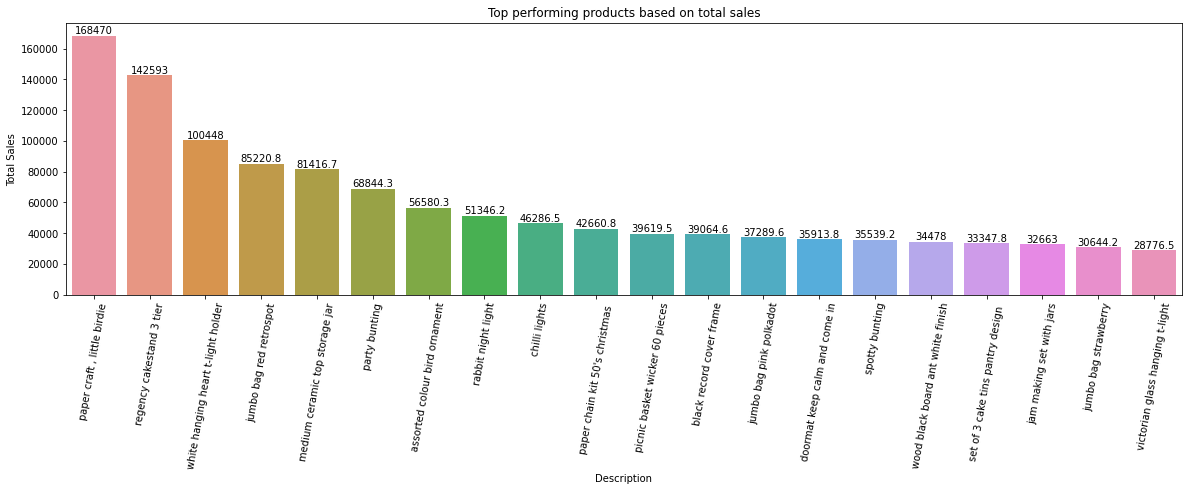

In [68]:
plt.figure(figsize = [20, 5])

g=sns.barplot(x=top_prod_totalsales.index, y=top_prod_totalsales.values)
plt.xticks(rotation=80)
plt.title("Top performing products based on total sales")
plt.xlabel("Description")
plt.ylabel("Total Sales")
g.bar_label(g.containers[0])
plt.show();

The top 3 performing products based on Totalsales is 
* paper craft , little birdie, 
* regency cakestand 3 tier 
* white hanging heart t-light holder.

In [69]:
#2. What are the top performing products based on Quantity sold?

top_prod_quantity = df_ecom.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(top_n)
top_prod_quantity

Description
jumbo bag red retrospot               363423
popcorn holder                        252563
white hanging heart t-light holder    229122
world war 2 gliders asstd designs     216342
small popcorn holder                  168374
brocade ring purse                    167905
spaceboy lunch box                    165270
assorted colour bird ornament         164098
pack of 12 london tissues             162809
pack of 72 retrospot cake cases       149446
jumbo bag pink polkadot               148271
cream heart card holder               136583
victorian glass hanging t-light       131294
red  harmonica in box                 128952
black record cover frame              119220
jumbo bag strawberry                  118630
rabbit night light                    114568
dolly girl lunch box                  113134
chilli lights                         102379
regency cakestand 3 tier               96644
Name: Quantity, dtype: int32

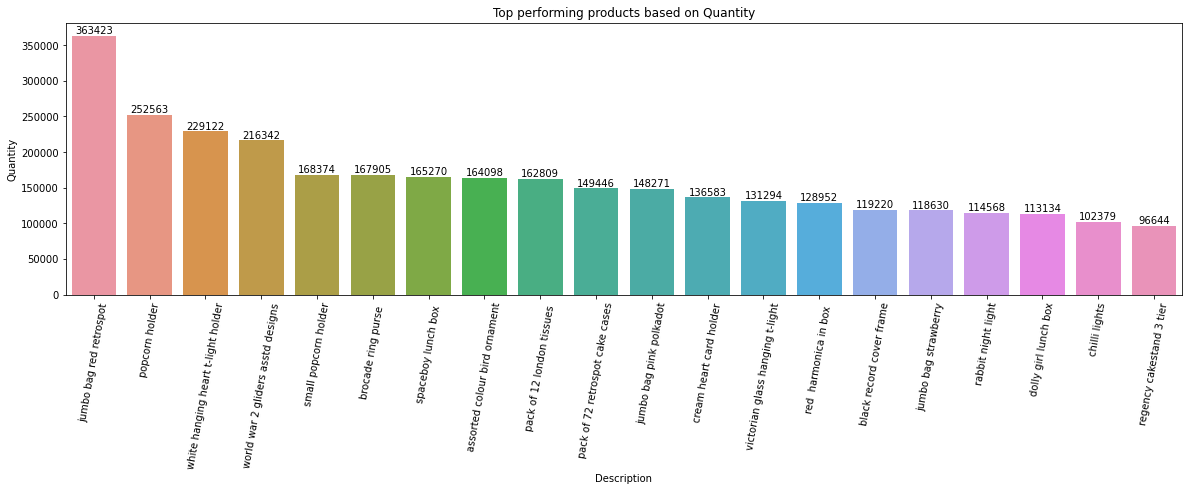

In [70]:
plt.figure(figsize = [20, 5])

g=sns.barplot(x=top_prod_quantity.index, y=top_prod_quantity.values)
plt.xticks(rotation=80)
plt.title("Top performing products based on Quantity")
plt.xlabel("Description")
plt.ylabel("Quantity")
g.bar_label(g.containers[0])
plt.show();

The top 3 performing products based on Quantity are:
* jumbo bag red retrospot
* popcorn holder
* white hanging heart t-light holder

Based on the sales performance, it is evident that the white hanging heart t-light holder is the best-selling product.

In [71]:
# Top performing customer based on quanity purchased.
top_n=20
top_customers_quantity = df_ecom.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(top_n)
top_customers_quantity

CustomerID
14646    1318329
14911     615442
18102     469651
17841     428785
16422     385139
17450     369656
15311     313145
15769     292932
15061     290188
16029     266862
17511     252099
17949     223985
16333     223456
13089     211340
14156     205486
12415     175946
12901     173118
16684     162588
14298     162484
14096     148749
Name: Quantity, dtype: int32

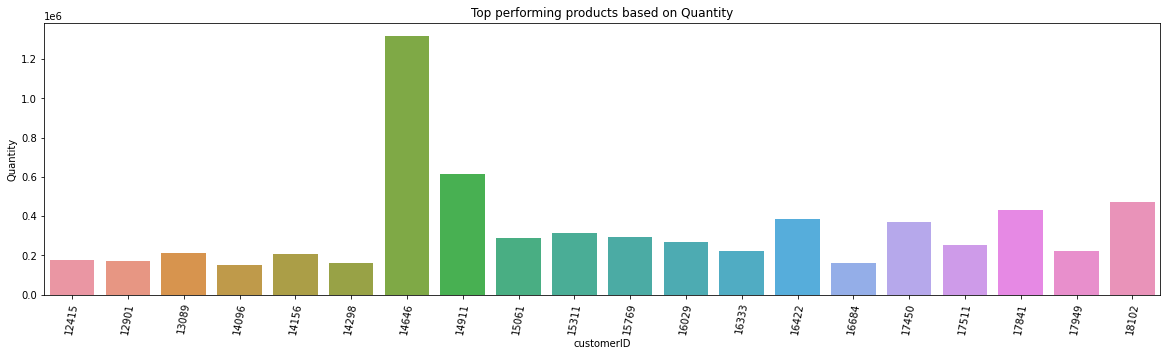

In [72]:
plt.figure(figsize = [20, 5])
g=sns.barplot(x=top_customers_quantity.index, y=top_customers_quantity.values)
plt.xticks(rotation=80)
plt.title("Top performing products based on Quantity")
plt.xlabel("customerID")
plt.ylabel("Quantity")

plt.show();

The top 3 performing customers based on total quantity  purchased are:
* 14646    
* 14911     
* 18102

In [73]:
#Top performing Customers based on totalsales
top_customers_totalsales = df_ecom.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending=False).head(top_n)
top_customers_totalsales

CustomerID
14646    279138.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    136275.72
12415    124564.53
14156    116729.63
17511     91062.38
12346     77183.60
16029     72882.09
16684     66653.56
13694     65039.62
15311     60767.90
13089     58825.83
17949     58030.48
15769     56252.72
15061     54534.14
14096     53258.43
14298     51527.30
14088     50491.81
Name: TotalSales, dtype: float64

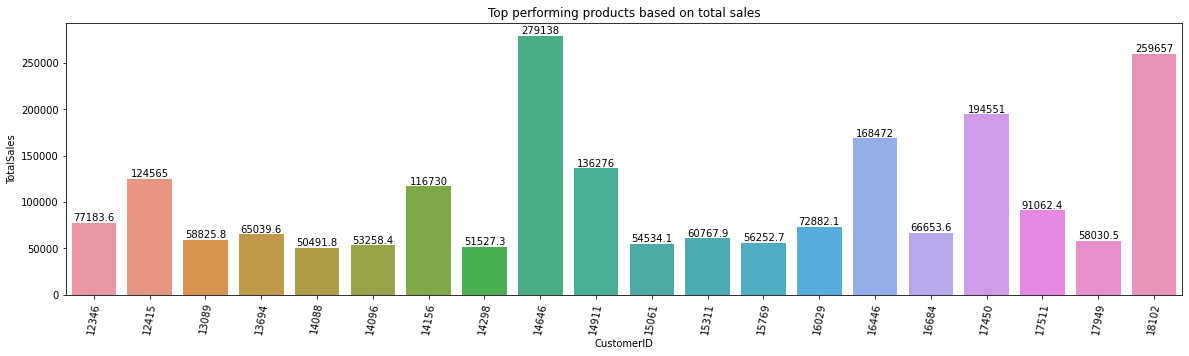

In [74]:
plt.figure(figsize = [20, 5])
g=sns.barplot(x=top_customers_totalsales.index, y=top_customers_totalsales.values)
plt.xticks(rotation=80)
plt.title("Top performing products based on total sales")
plt.xlabel("CustomerID")
plt.ylabel("TotalSales")
g.bar_label(g.containers[0])
plt.show();


The top performing Customers based on Totalsales are
* 14646    
* 18102    
* 17450

By analyzing the TotalSales and Quantity purchased, it is customer 14646 has performed the best.

In [75]:
#group data by month and calculate the TotalSales
monthly_sales=df_ecom.groupby(df_ecom['InvoiceDate'].dt.to_period('M'))['TotalSales'].sum()
monthly_sales

InvoiceDate
2018-11      93502.82
2018-12     473987.90
2019-01     607171.37
2019-02     440920.65
2019-03     567916.71
2019-04     438023.35
2019-05     697016.74
2019-06     623102.35
2019-07     620231.11
2019-08     663209.89
2019-09     886547.61
2019-10    1061573.46
2019-11    1163112.30
2019-12     424750.39
Freq: M, Name: TotalSales, dtype: float64

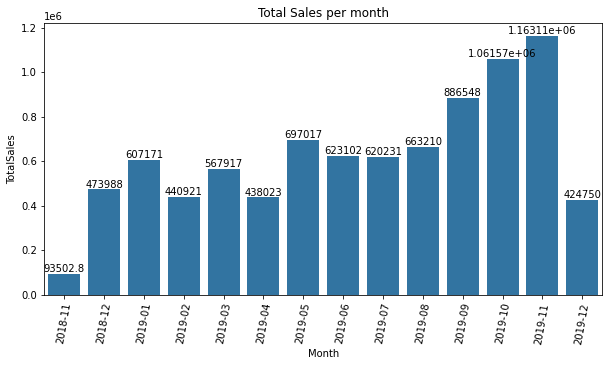

In [76]:
plt.figure(figsize = [10, 5])
base_color=sns.color_palette()[0]
g=sns.barplot(x=monthly_sales.index, y=monthly_sales.values, color=base_color)
plt.xticks(rotation=80)
plt.title("Total Sales per month")
plt.xlabel("Month")
plt.ylabel("TotalSales")
g.bar_label(g.containers[0])
plt.show();

In November (2018-11) , the Total sales were $93502.82,In December(2018-12) , the Total sales increased to $473987.90 and the pattern continues for the remaining months. The December(2019-12) has the highest sales figure of $1163112.30, which is the highest value amoung all the months.

In [77]:
sales_per_day = df_ecom.groupby('Day')['TotalSales'].sum().sort_values(ascending=False).head(top_n)
sales_per_day

Day
Friday       1943072.25
Wednesday    1675393.95
Thursday     1563521.59
Saturday     1462633.67
Tuesday      1329682.49
Monday        786762.70
Name: TotalSales, dtype: float64

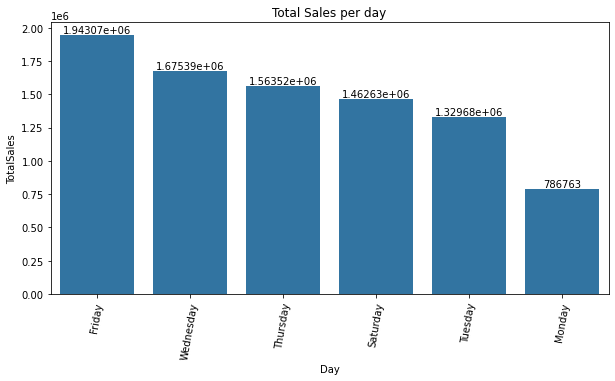

In [78]:
plt.figure(figsize = [10, 5])
base_color=sns.color_palette()[0]
g=sns.barplot(x=sales_per_day.index, y=sales_per_day.values, color=base_color)
plt.xticks(rotation=80)
plt.title("Total Sales per day")
plt.xlabel("Day")
plt.ylabel("TotalSales")
g.bar_label(g.containers[0])
plt.show();

This suggests that Fridays tend to be the most profitable day for the business, Wednesday and Thrusday also show strong sales performance.

In [79]:
#extract the date from InvoiceDate
df_ecom['Date'] = df_ecom['InvoiceDate'].dt.date

#Group by date and count the number of orders
daily_orders = df_ecom.groupby('Date')['InvoiceNo'].nunique()
daily_orders

Date
2018-11-29    121
2018-11-30    136
2018-12-01     57
2018-12-03     87
2018-12-04     94
             ... 
2019-12-03    115
2019-12-04    110
2019-12-05    103
2019-12-06    113
2019-12-07     41
Name: InvoiceNo, Length: 305, dtype: int64

In [80]:
#date and count the number of unique customers
daily_customers=df_ecom.groupby('Date')['CustomerID'].nunique()
daily_customers


Date
2018-11-29     95
2018-11-30     98
2018-12-01     50
2018-12-03     75
2018-12-04     82
             ... 
2019-12-03    105
2019-12-04    103
2019-12-05     93
2019-12-06    105
2019-12-07     35
Name: CustomerID, Length: 305, dtype: int64

In [81]:
#date and calculate the totalsales
daily_sales = df_ecom.groupby('Date')['TotalSales'].sum()
daily_sales

Date
2018-11-29     46219.29
2018-11-30     47283.53
2018-12-01     23576.01
2018-12-03     31315.64
2018-12-04     31014.21
                ...    
2019-12-03     55920.60
2019-12-04     45584.19
2019-12-05     68699.21
2019-12-06     50214.15
2019-12-07    184190.28
Name: TotalSales, Length: 305, dtype: float64

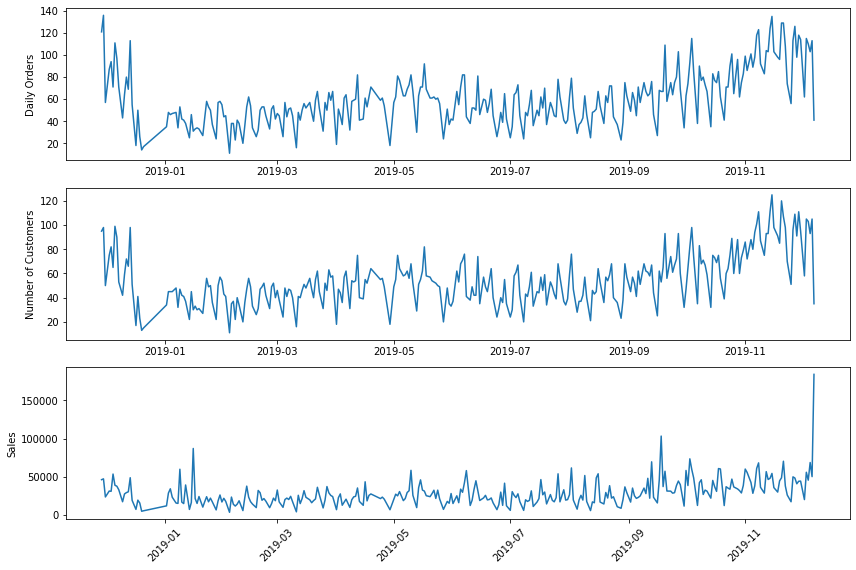

In [82]:
#create subplots 
fig, ax=plt.subplots(3, 1, figsize=(12, 8))

#daily_orders
ax[0].plot(daily_orders.index, daily_orders.values)
ax[0].set_ylabel('Daily Orders')


#daily number of customers
ax[1].plot(daily_customers.index, daily_customers.values)
ax[1].set_ylabel('Number of Customers')

#daily sales
ax[2].plot(daily_sales.index, daily_sales.values)
ax[2].set_ylabel('Sales')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Correlation Analysis

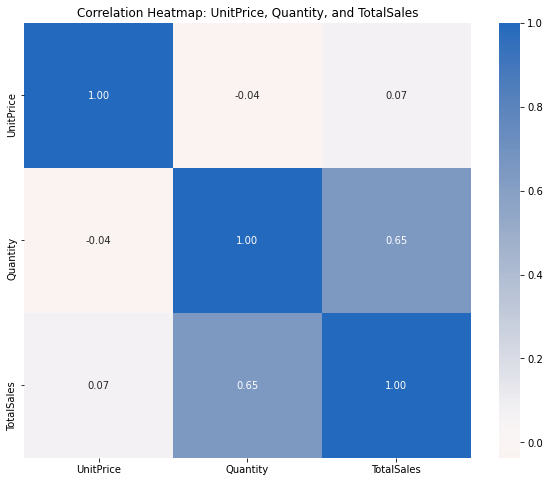

In [83]:
# check for relationship between Unitprice, Quantity and Totalsales
plt.figure(figsize = [10, 8])
sns.heatmap(df_ecom[['UnitPrice', 'Quantity', 'TotalSales']].corr(), annot=True, fmt='.2f', cmap='vlag_r', center=0)
plt.title("Correlation Heatmap: UnitPrice, Quantity, and TotalSales")
plt.show()

* The correaltion between UnitPrice, Quantity, and TotalSales and itself is 1 indicating a perfect positive correlation. 
* UnitPrice and Quantity has the correlation of -0.04, indicating weak negative correlation and suggest that it has slight higher unit prices associated with lower quantities sold.
* Unitprice and Totalsale has the weak positive correlation of 0.07 suggesting that there is slight higher UnitPrice associated with higher total sales.
* Quantity and TotalSales has the correlation of 0.65 indicating positive correlation suggesting that there is a positive relationship between the quantity sold and the total sales amount.

####  Analysis on Returned Items

In [84]:
#create a copy of original dataset where cancellations are still intact
returns = df_ecom.copy()

In [85]:
returns.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalSales,Month,Day,Hour,Date
0,536365,85123A,white hanging heart t-light holder,122,2018-11-29,2.55,17850,15.30,11,Thursday,8,2018-11-29
1,536365,71053,white metal lantern,122,2018-11-29,3.39,17850,20.34,11,Thursday,8,2018-11-29
2,536365,84406B,cream cupid hearts coat hanger,108,2018-11-29,2.75,17850,22.00,11,Thursday,8,2018-11-29
3,536365,84029G,knitted union flag hot water bottle,110,2018-11-29,3.39,17850,20.34,11,Thursday,8,2018-11-29
4,536365,84029E,red woolly hottie white heart.,104,2018-11-29,3.39,17850,20.34,11,Thursday,8,2018-11-29


In [86]:
#delete records where stockcode is AMAZONFEE, BANK CHARGES C2, CRUK, D, DOT, M , PADS, POST, S, m
alpha_r = ['AMAZONFEE', 'BANK', 'CHARGES', 'C2', 'CRUK', 'D', 'DOT', 'M' , 'PADS', 'POST', 'S', 
           'm']
returns = returns[~returns['StockCode'].isin(alpha_r)]

In [87]:
#delete records where Unitprice is 0
returns = returns[returns['UnitPrice'] != 0 ]

In [88]:
returns['Date'] = returns['InvoiceDate'].dt.date

In [89]:
#add column TotalSales 
returns['TotalSales'] = returns['Quantity'] * returns['UnitPrice']

In [90]:
product_return_sales = returns.groupby('Description')['TotalSales'].sum().sort_values(ascending=False)

In [91]:
returns = ecommerce[ecommerce['Quantity'] < 0]
returns.groupby(['Description'])['Quantity'].sum().sort_values()

Description
paper craft , little birdie        -80995
medium ceramic top storage jar     -74494
printing smudges/thrown away       -28258
unsaleable, destroyed.             -15644
check                              -13381
                                    ...  
retrospot babushka doorstop            -1
blue geisha girl                       -1
funky washing up gloves assorted       -1
food container set 3 love heart        -1
next day carriage                      -1
Name: Quantity, Length: 2098, dtype: int64

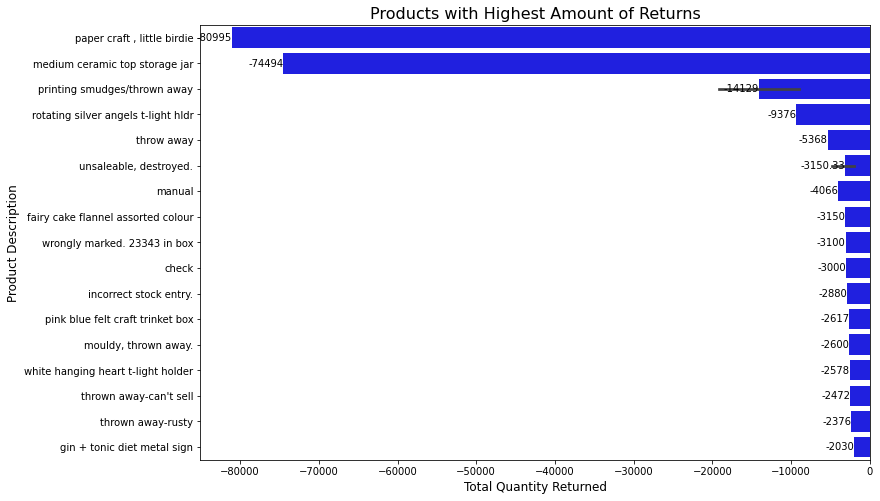

In [92]:
#1.Which Products have the highest amount of Returns?
returns = returns[returns['Quantity'] < 0]
return_by_prod = returns.groupby(['StockCode', 'Description'])['Quantity'].sum().reset_index()
return_by_prod = return_by_prod.sort_values(by='Quantity', ascending=True)

top_returned_prod = return_by_prod.head(20)
top_returned_prod

#plotting graph
plt.figure(figsize=(12, 8))
g=sns.barplot(x='Quantity', y='Description', data=top_returned_prod, color='blue')
plt.title('Products with Highest Amount of Returns', size=16)
plt.xlabel('Total Quantity Returned', size=12)
plt.ylabel('Product Description', size=12)
g.bar_label(g.containers[0])
plt.show()

In [93]:
#2.Which products have the largest amount of Returns?
returns['TotalSales'] = returns['Quantity'] * returns['UnitPrice']

returns = returns[returns['Quantity'] < 0]
product_return_sales = returns.groupby('Description')['TotalSales'].sum().sort_values(ascending=False)
product_return_sales

Description
sold as set on dotcom and amazon         0.00
sold as set/6 by dotcom                  0.00
mystery! only ever imported 1800         0.00
not rcvd in 10/11/2010 delivery          0.00
given away                               0.00
                                      ...    
postage                             -11871.24
medium ceramic top storage jar      -77479.64
manual                             -146784.46
paper craft , little birdie        -168469.60
amazon fee                         -235281.59
Name: TotalSales, Length: 2098, dtype: float64

In [94]:

returns = returns[returns['Quantity'] < 0]

#Group the returns by product description and calculate the count
return_counts = returns['Description'].value_counts().reset_index()
return_counts.columns = ['Description', 'Return Count']

#sort products by return count in descending order
return_counts = return_counts.sort_values(by='Return Count', ascending=False)

top_returned_products = return_counts.head(20)
top_returned_products

,Description,Return Count
0,manual,244
1,regency cakestand 3 tier,181
2,postage,126
3,check,123
4,jam making set with jars,87
5,discount,77
6,set of 3 cake tins pantry design,74
7,samples,62
8,damaged,57
9,strawberry ceramic trinket box,55


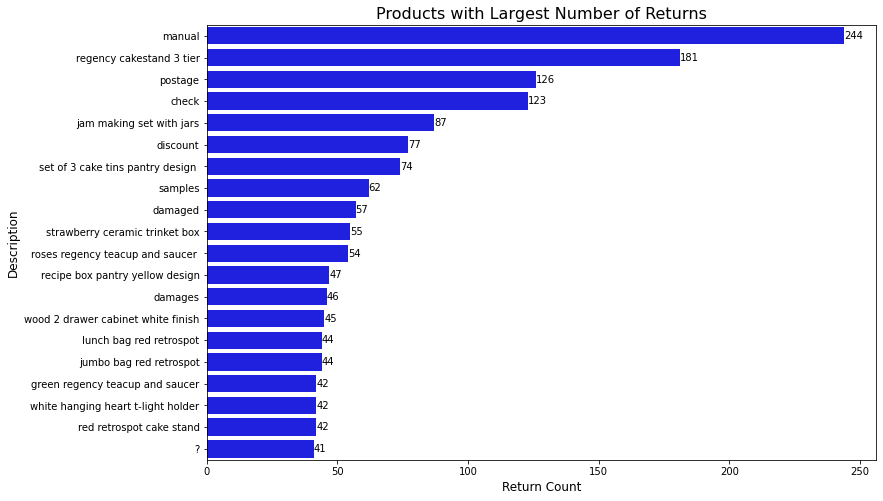

In [95]:
#plotting the graph
plt.figure(figsize=(12, 8))
g=sns.barplot(x='Return Count', y='Description', data=top_returned_products, color='blue')
plt.title('Products with Largest Number of Returns', size=16)
plt.xlabel('Return Count', size=12)
plt.ylabel('Description', size=12)
g.bar_label(g.containers[0])
plt.show()

In [96]:
#3.Customers with highest amount of returns
returns_by_customer = returns.groupby('CustomerID')['TotalSales'].sum().sort_values(ascending=False)
print(returns_by_customer)

CustomerID
15903        -0.42
17334        -0.42
16566        -0.65
12421        -0.77
17164        -0.95
           ...    
15749    -22998.40
16029    -30032.23
15098    -39267.00
12346    -77183.60
16446   -168469.60
Name: TotalSales, Length: 1589, dtype: float64


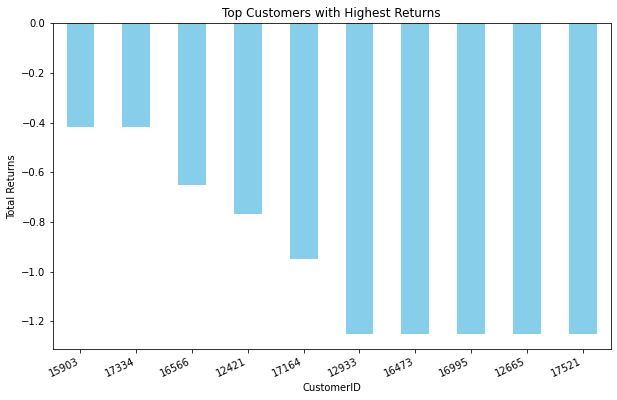

In [97]:
# Assuming returns_by_customer is already defined
top_customers = returns_by_customer.head(10)  # Adjust the number based on your preference

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='skyblue')
plt.title('Top Customers with Highest Returns')
plt.xlabel('CustomerID')
plt.ylabel('Total Returns')
plt.xticks(rotation=25, ha='right')
plt.show()

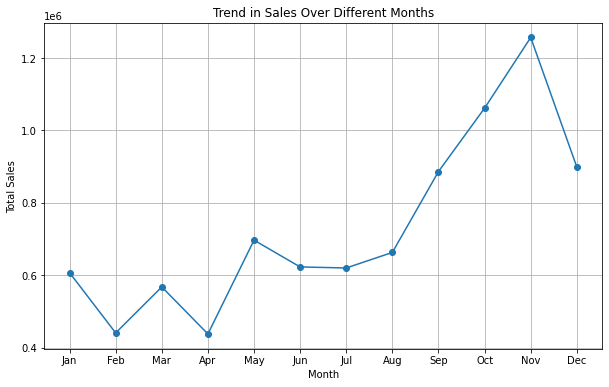

In [98]:
# What is the trend in sales over different months or days of the week?
# Calculate total sales per month
monthly_sales = df_ecom.groupby(df_ecom['InvoiceDate'].dt.month)['TotalSales'].sum()

# Define month labels
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Visualize the trend
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Trend in Sales Over Different Months')
plt.xticks(range(1, 13), month_labels)  # Label months with custom labels
plt.grid(True)
plt.show()

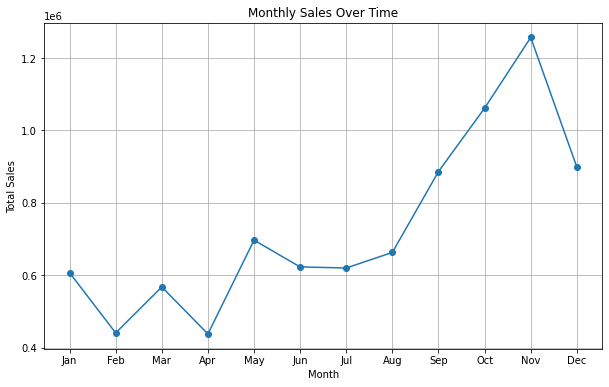

In [99]:
#Are there any seasonality patterns in sales data?
# Plot monthly sales
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Over Time')
plt.grid(True)
plt.xticks(monthly_sales.index, month_labels)  # Label months with custom labels
plt.show()

In [100]:
#Who are the top customers in terms of total purchases?

# Calculate total purchases per customer
customer_total_purchases = df_ecom.groupby('CustomerID')['TotalSales'].sum()

# Identify the top customers
top_customers = customer_total_purchases.sort_values(ascending=False).head(10)
top_customers

CustomerID
14646    279138.02
18102    259657.30
17450    194550.79
16446    168472.50
14911    136275.72
12415    124564.53
14156    116729.63
17511     91062.38
12346     77183.60
16029     72882.09
Name: TotalSales, dtype: float64

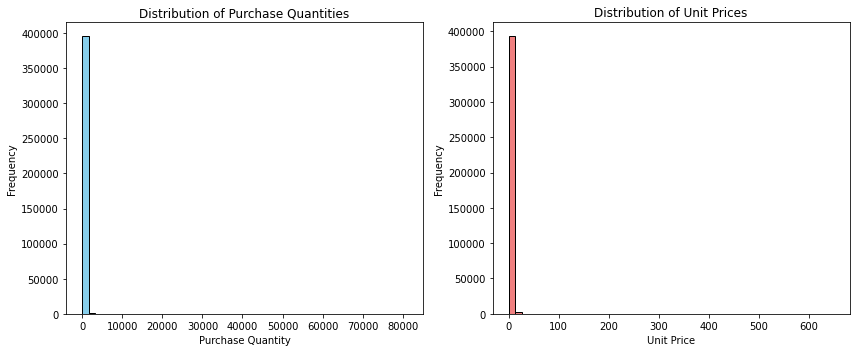

In [101]:
#What is the distribution of purchase quantities and unit prices?
# Create histograms for purchase quantities and unit prices
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_ecom['Quantity'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Purchase Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase Quantities')

plt.subplot(1, 2, 2)
plt.hist(df_ecom['UnitPrice'], bins=50, color='lightcoral', edgecolor='black')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Distribution of Unit Prices')

plt.tight_layout()
plt.show()

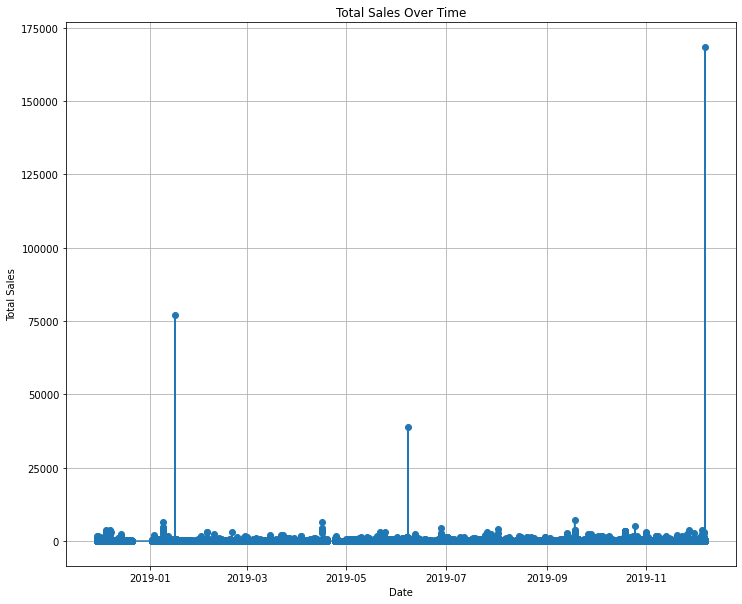

In [102]:
# Time Series Plot of Total Sales Over Time:
#Visualize the total sales over the entire period of available data.
#Use a line chart to display the trend.

# Create a time series plot of total sales over time
plt.figure(figsize=(12, 10))
plt.plot(df_ecom['InvoiceDate'], df_ecom['TotalSales'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales Over Time')
plt.grid(True)
plt.show()

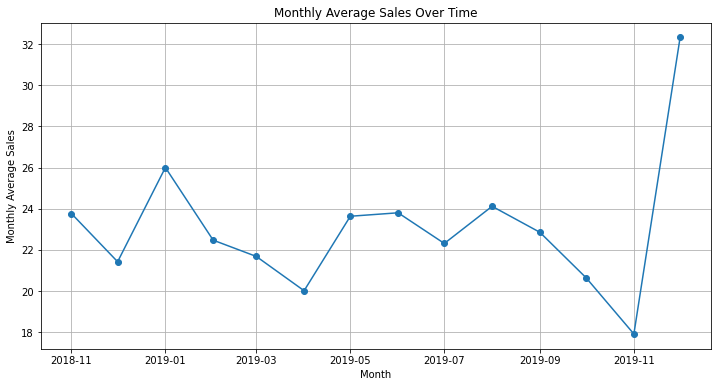

In [103]:
#Monthly Average Sales:
#Calculate the average sales for each month.
#Visualize the monthly average sales using a line chart.

# Convert the datetime index to periods (months)
df_ecom['MonthPeriod'] = df_ecom['InvoiceDate'].dt.to_period('M')

# Calculate the monthly average sales
monthly_avg_sales = df_ecom.groupby('MonthPeriod')['TotalSales'].mean()

# Convert the index (MonthPeriod) to datetime for plotting
monthly_avg_sales.index = monthly_avg_sales.index.to_timestamp()

# Create a line chart to visualize monthly average sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_sales.index, monthly_avg_sales.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Monthly Average Sales')
plt.title('Monthly Average Sales Over Time')
plt.grid(True)
plt.show()

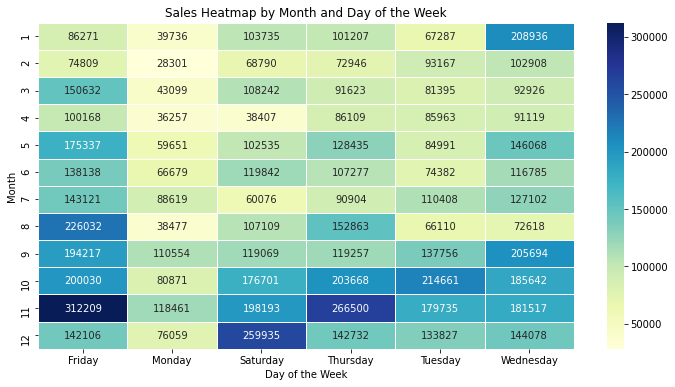

In [104]:
#Heatmap of Sales by Month and Day:
#Create a heatmap to visualize sales patterns by month and day of the week.
#Use seaborn's heatmap function to create the plot.

import seaborn as sns

# Pivot the data to create a sales matrix by month and day of the week
sales_matrix = df_ecom.pivot_table(values='TotalSales', index=df_ecom['InvoiceDate'].dt.month, 
                                   columns=df_ecom['InvoiceDate'].dt.day_name(), aggfunc='sum')

# Create a heatmap to visualize sales patterns
plt.figure(figsize=(12, 6))
sns.heatmap(sales_matrix, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=.5)
plt.xlabel('Day of the Week')
plt.ylabel('Month')
plt.title('Sales Heatmap by Month and Day of the Week')
plt.show()

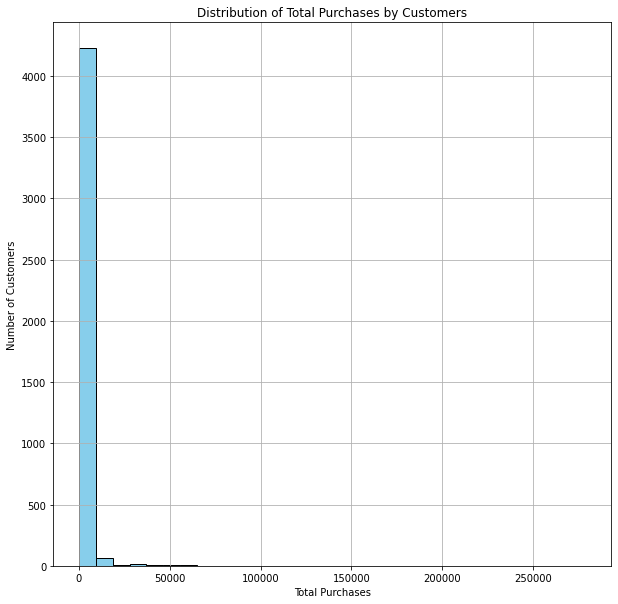

In [105]:
#Customer Distribution:
#Visualize the distribution of total purchases by customers.
#Use a histogram or bar chart to display the distribution.

# Calculate total purchases per customer
customer_total_purchases = df_ecom.groupby('CustomerID')['TotalSales'].sum()

# Create a histogram or bar chart to visualize the customer distribution
plt.figure(figsize=(10, 10))
plt.hist(customer_total_purchases, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Total Purchases')
plt.ylabel('Number of Customers')
plt.title('Distribution of Total Purchases by Customers')
plt.grid(True)
plt.show()

1. Which Products have the highest amount of Returns?
   * paper craft , little birdie has the highest amount of Returns.
   
2. Which products have the largest amount of Returns?
   * paper craft , little birdie has the largest amount of Returns.
   
3. What are the most frequently returned products?
   * regency cakestand 3 tier its one of the top performing product as well as the most frequently returned product.
   
4. Who are the customers with highest amount of returns?
    * CustomerID 14646 is the customer who has highest amount of product returns.
    
5. Who are the customers with large number of returns?
    * CustomerID 14646 is the customer who has largest amount of product returns.
    
6. Who are the customers most frequently returning products?
    * CustomerID 17841 is the top customer who has frequently returning the products.
    
7.  Which months have the higest amount of returns?
    * The highest returns are between the 10th and 11th Month.
   